In [7]:
%matplotlib notebook

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import uniform
import numpy as np


A simple implementation of a Monte Carlo estimate for $\pi$, as described in "Gibbs Sampling for the Uninitiated" by Eric Hardisty and Philip Resnik, available at http://legacydirs.umiacs.umd.edu/~resnik/pubs/LAMP-TR-153.pdf

We can take a square S of side length 2 with center at the origin and inscribe in it a circle C of radius 1, also with its center at the origin. 

<IPython.core.display.Javascript object>


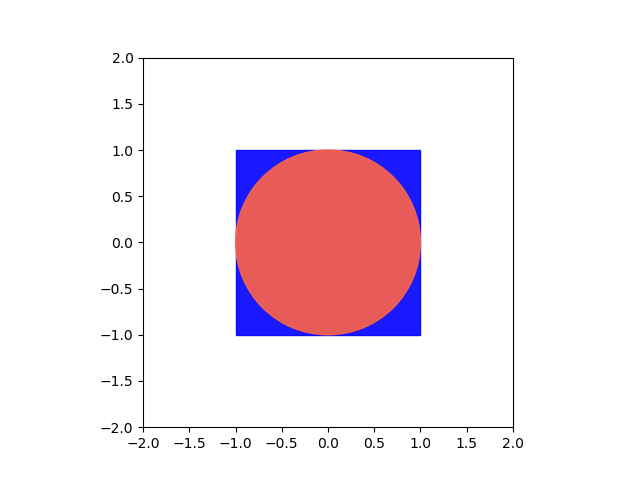

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.set_xlim(left=-2, right=2)
ax.set_ylim(bottom=-2, top=2)

ax.add_patch(
    patches.Rectangle((-1, -1), 2, 2, color='b', alpha = 0.9)
)

ax.add_patch(
    patches.Circle((0, 0), radius=1, color='tomato', alpha=0.9)
)



We need a function to sample points uniformly from S. We can do this by returning tuples $U = (u_{1}, u_{2})$
where both $u_{1}$ and $u_{2}$ are independent random variables both sampled uniformly from the interval $[-1, 1]$

In [43]:
def sample_square():
    u_1, u_2 = uniform.rvs(loc=-1, scale=2, size=2)
    return tuple([u_1, u_2])


Now let's generate 200 samples from the square S.

In [44]:
samples = np.asarray([sample_square() for _ in range(200)])

The area of S is $4$. The area of C, which is contained in S, is $\pi$. Given U, a random variable sampled uniformly at random from the interior of S, then $P(U \in C) = \frac{\pi}{4}$. <br>Now let $I_{U}$ be the indicator of the event $\{U \in C\}$. Then $EI_{U} = \frac{\pi}{4}$. <br>Now given a sequence $U_{j}$ of random variables sampled independently uniformly at random from the interior of S, we can let $I_{j}$ be the indicator of the event 
$\{U_{j} \in C\}$. Then by the law of large numbers, $\frac{1}{n}\sum_{j=1}^{j=n}I_{j} \overset{p}{\to} \frac {\pi}{4}$. The upshot of all this is that if we sample many points from the interior of S, we should be able to use the proportion of points that fell inside of C to approximate $\pi$.<br><br>
By taking large enough n, we should find that $\frac{4}{n}\sum_{j=1}^{j=n}I_{j} \approx \pi$.

Now given $U = (u_{1}, u_{2})$ sampled uniformly at random from the interior of S, we have that U belongs to the interior of C if $u^{2}_{1} + u^{2}_{2} \leq 1$. Let's use this to generate the sequence $I_{j}$ from our sequence $U_{j}$ of samples.

In [45]:
indicators = np.apply_along_axis(lambda x: 1 if np.dot(x, x) <= 1 else 0, axis=1, arr=samples)

Now let's move to plot the samples on the square and circle. We can look at the first 50 samples, the first 100 samples, and then all 200 samples.

First, let's separate the samples that fell in the circle from those that didn't.

In [60]:
first_50 = samples[:50]

in_circle_50 = first_50[indicators[:50] == 1]
out_circle_50 = first_50[indicators[:50] == 0]

first_100 = samples[:100]

in_circle_100 = first_100[indicators[:100] == 1]
out_circle_100 = first_100[indicators[:100] == 0]


in_circle_200 = samples[indicators == 1]
out_circle_200 = samples[indicators == 0]


<IPython.core.display.Javascript object>


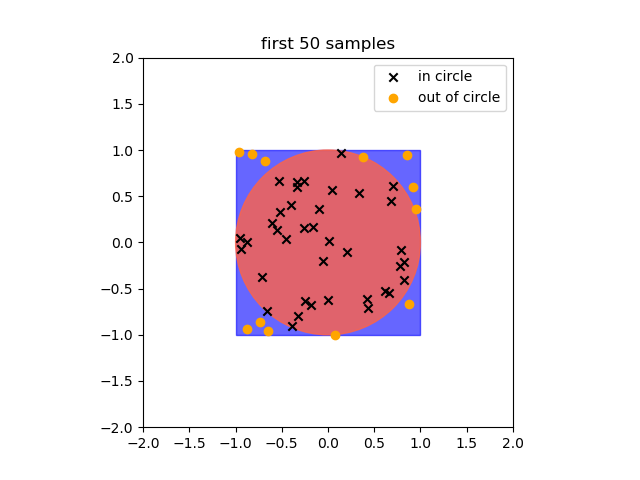

In [90]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1, aspect='equal')
ax1.set_xlim(left=-2, right=2)
ax1.set_ylim(bottom=-2, top=2)
ax1.set_title('first 50 samples')
ax1.add_patch(
    patches.Rectangle((-1, -1), 2, 2, color='b', alpha = 0.6)
)

ax1.add_patch(
    patches.Circle((0, 0), radius=1, color='tomato', alpha=0.8)
)

ax1.scatter(in_circle_50[:, 0], in_circle_50[:, 1], c='black', marker='x', zorder=3, label='in circle')
ax1.scatter(out_circle_50[:, 0], out_circle_50[:, 1], c='orange', marker='o', zorder=2, label='out of circle')

ax1.legend()

<IPython.core.display.Javascript object>


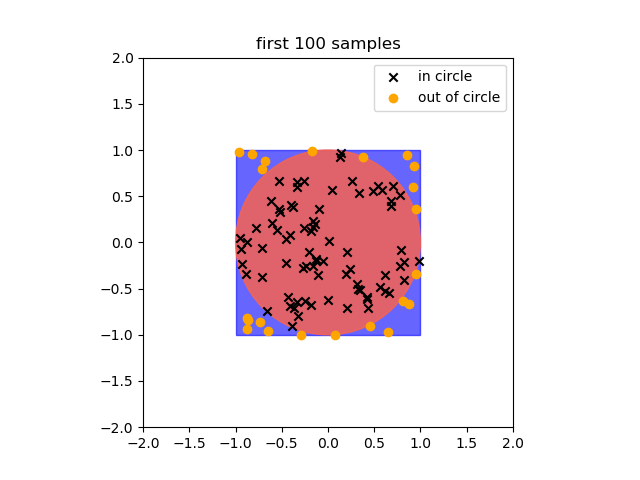

In [91]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1, aspect='equal')
ax1.set_xlim(left=-2, right=2)
ax1.set_ylim(bottom=-2, top=2)
ax1.set_title('first 100 samples')
ax1.add_patch(
    patches.Rectangle((-1, -1), 2, 2, color='b', alpha = 0.6)
)

ax1.add_patch(
    patches.Circle((0, 0), radius=1, color='tomato', alpha=0.8)
)

ax1.scatter(in_circle_100[:, 0], in_circle_100[:, 1], c='black', marker='x', zorder=3, label='in circle')
ax1.scatter(out_circle_100[:, 0], out_circle_100[:, 1], c='orange', marker='o', zorder=2, label='out of circle')

ax1.legend()

<IPython.core.display.Javascript object>


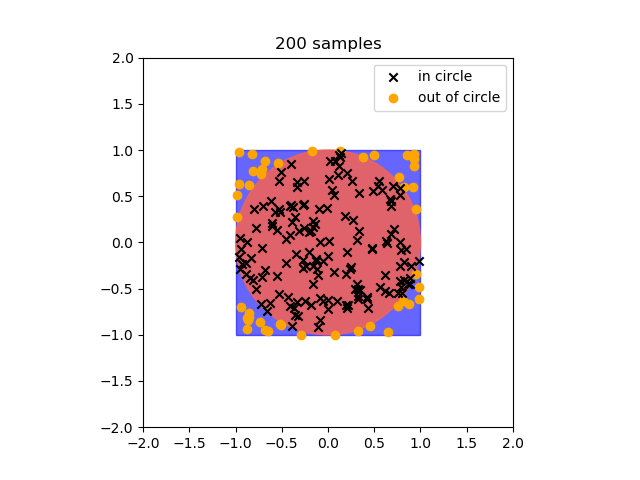

In [93]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1, aspect='equal')
ax1.set_xlim(left=-2, right=2)
ax1.set_ylim(bottom=-2, top=2)
ax1.set_title('200 samples')
ax1.add_patch(
    patches.Rectangle((-1, -1), 2, 2, color='b', alpha = 0.6)
)

ax1.add_patch(
    patches.Circle((0, 0), radius=1, color='tomato', alpha=0.8)
)

ax1.scatter(in_circle_200[:, 0], in_circle_200[:, 1], c='black', marker='x', zorder=3, label='in circle')
ax1.scatter(out_circle_200[:, 0], out_circle_200[:, 1], c='orange', marker='o', zorder=2, label='out of circle')

ax1.legend()

<IPython.core.display.Javascript object>


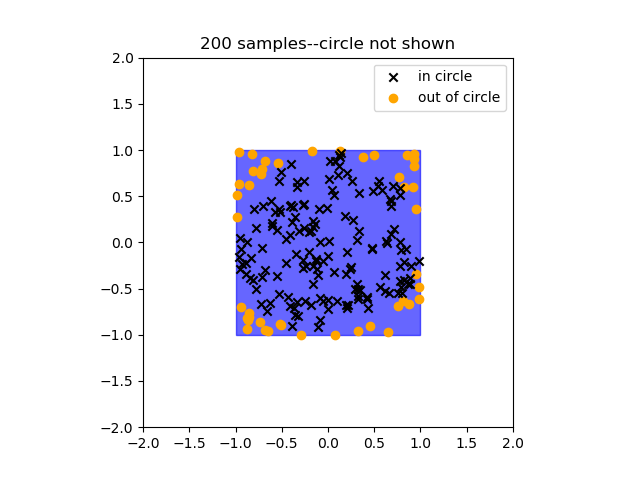

In [94]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1, aspect='equal')
ax1.set_xlim(left=-2, right=2)
ax1.set_ylim(bottom=-2, top=2)
ax1.set_title('200 samples--circle not shown')
ax1.add_patch(
    patches.Rectangle((-1, -1), 2, 2, color='b', alpha = 0.6)
)


ax1.scatter(in_circle_200[:, 0], in_circle_200[:, 1], c='black', marker='x', zorder=3, label='in circle')
ax1.scatter(out_circle_200[:, 0], out_circle_200[:, 1], c='orange', marker='o', zorder=2, label='out of circle')

ax1.legend()

Now let's see whether we are able to get a good approximation to the value of $\pi$ from samples.

In [102]:
weights = np.asarray([4/n for n in range(1, 201)])

In [104]:
means = np.multiply(indicators.cumsum(), weights)

<IPython.core.display.Javascript object>


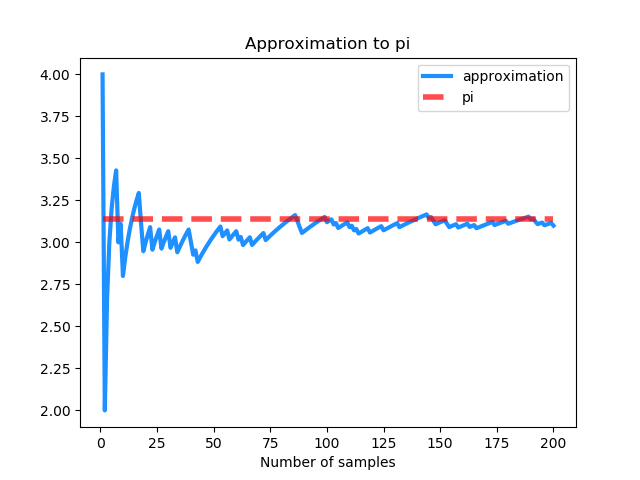

In [121]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Approximation to pi")
ax.plot(range(1, 201), means, color='dodgerblue', lw=3, label='approximation')
ax.plot(range(1, 201), [np.pi]*200, color='red', linestyle='dashed', lw=4, alpha=0.7, label='pi')
ax.legend()
ax.set_xlabel("Number of samples")

We can see the value stabilizing more and more around $\pi$. And so this is a simple example of using a Monte Carlo method. We basically just use probability theory and simulation to approximate a calculation.